In [36]:
#Import Libraries#
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import pandas as pd

import matplotlib.pyplot as plt


In [2]:
url="https://www.worldometers.info/coronavirus/"

response = requests.get(url) #Raw data

soup = BeautifulSoup(response.text,"html.parser") #soup became bs4.beautifulsoup obj that holds all html

##print(soup.prettify())

text=soup.find(id="main_table_countries_today").get_text()


In [3]:

#cols_list=cols_raw.find_all('th')

In [4]:
#Create list of Columns
cols_raw=soup.find('thead') #find Thead module
cols=cols_raw.find_all("th") #find all th in the Thead
columns_list=[] #New list
for x in cols: #append all th into list
    columns_list.append(x.get_text())
print(columns_list)

['Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'ActiveCases', 'Serious,Critical', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', '1stcase']


In [5]:
# scrap All table
list_of_lists=[] # list of lists for each row


table_raw=soup.find('tbody')
table=table_raw.find_all('tr')
for row in table:
    uni_row_list=[] #1 row list
    uni_row=row.find_all('td')
    for i in uni_row:
        uni_row_list.append(i.get_text())
    list_of_lists.append(uni_row_list)


In [6]:
len(list_of_lists)

201

In [14]:
corona_df = pd.DataFrame.from_records(list_of_lists, columns=columns_list)


In [15]:
corona_df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,1stcase
0,USA,"141,854","+18,276","2,475",+255,"4,435","134,944","2,970",429,7,\nJan 20
1,Italy,"97,689","+5,217","10,779",+756,"13,030","73,880","3,906","1,616",178,\nJan 29
2,Spain,"80,110","+6,875","6,803",+821,"14,709","58,598","4,165","1,713",146,\nJan 30
3,Germany,"62,095","+4,400",541,+108,"9,211","52,343","1,979",741,6,\nJan 26
4,France,"40,174","+2,599","2,606",+292,"7,202","30,366","4,632",615,40,\nJan 23
...,...,...,...,...,...,...,...,...,...,...,...
196,Saint Kitts and Nevis,2,,,,,2,,38,,\nMar 24
197,Papua New Guinea,1,,,,,1,,0.1,,\nMar 19
198,St. Vincent Grenadines,1,,,,1,0,,9,,\nMar 10
199,Timor-Leste,1,,,,,1,,0.8,,\nMar 20


In [17]:
# Reformat the data into useful datatypes
print (corona_df.info())

####Here we need to change all str's to int's ######

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 11 columns):
Country,Other       201 non-null object
TotalCases          201 non-null object
NewCases            201 non-null object
TotalDeaths         201 non-null object
NewDeaths           201 non-null object
TotalRecovered      201 non-null object
ActiveCases         201 non-null object
Serious,Critical    201 non-null object
Tot Cases/1M pop    201 non-null object
Deaths/1M pop       201 non-null object
1stcase             201 non-null object
dtypes: object(11)
memory usage: 17.4+ KB
None


In [52]:
#Convert Data into Usefull ints

#corona_df.TotalCases=corona_df.TotalCases.str.replace(',', '')
corona_df.TotalDeaths=corona_df.TotalDeaths.str.replace(',', '')
corona_df.TotalDeaths=corona_df.TotalDeaths.str.replace(' ', '0')


In [50]:
#corona_df.fillna(0, inplace=True)

In [53]:
#corona_df.TotalCases=corona_df.TotalCases.astype(str).astype(int)
corona_df.TotalDeaths=corona_df.TotalDeaths.astype(str).astype(int)

In [54]:
print (corona_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 11 columns):
Country,Other       201 non-null object
TotalCases          201 non-null int32
NewCases            201 non-null object
TotalDeaths         201 non-null int32
NewDeaths           201 non-null object
TotalRecovered      201 non-null object
ActiveCases         201 non-null object
Serious,Critical    201 non-null object
Tot Cases/1M pop    201 non-null object
Deaths/1M pop       201 non-null object
1stcase             201 non-null object
dtypes: int32(2), object(9)
memory usage: 15.8+ KB
None


In [59]:
deaths_num=corona_df.TotalDeaths
region=corona_df["Country,Other"]

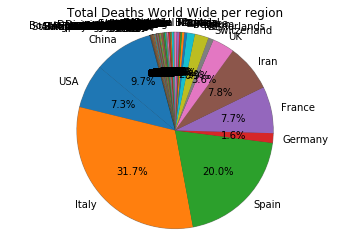

In [68]:
labels=region
sizes = deaths_num


# Plot
plt.title("Total Deaths World Wide per region")
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()